In [14]:
from ete3 import Tree, TreeStyle, PieChartFace,NodeStyle
import seaborn as sns
import os
import numpy as np
from Bio import SeqIO
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [16]:
tree = Tree("results/pangenomics/pyparanoid/ppk1_clean.tre")
strains = tree.get_leaf_names()

In [17]:
matrixfile = open("results/pangenomics/pyparanoid/homolog_matrix.txt", "r")
header = matrixfile.readline().rstrip().split("\t")
indices = [header.index(s) for s in strains]

In [18]:
lines = []
for line in matrixfile:
    vals = line.rstrip().split("\t")
    lines.append([int(bool(int(vals[i]))) for i in indices])
a = np.stack(lines)

In [19]:
genome_sizes = {}
for s in strains:
    count = 0
    for seq in SeqIO.parse(open("results/pangenomics/pyparanoid/pep/{}.pep.fa".format(s), "r"), "fasta"):
        count += 1
    genome_sizes[s] = count

In [20]:

def add_piecharts(node,nstyle,strains,a,genome_sizes,pal):
	node_strains = node.get_leaf_names()
	node.set_style(nstyle)
	if len(node_strains) > 1:
		col_indices = [strains.index(ns) for ns in node_strains]
		orth_count = 0
		for i in range(a.shape[0]):
			if np.count_nonzero(a[i,col_indices]) == len(col_indices):
				orth_count += 1
		frac = float(orth_count)/float(sum([genome_sizes[ns] for ns in node_strains])/len(node_strains))
        ### Change the following line for scaling the pie chart size
		size = math.sqrt(len(node_strains)) * 7
		f = PieChartFace([frac*100,100-(frac*100)],size,size,colors=[colors.rgb2hex(c) for c in [pal[0],pal[7]]])
		node.add_face(f,0)
	return

In [21]:
pal = sns.color_palette("Set2",10)
nstyle = NodeStyle()
nstyle["size"] = 0
for node in tree.iter_descendants("preorder"):
    add_piecharts(node,nstyle,strains,a,genome_sizes,pal)
add_piecharts(tree,nstyle,strains,a,genome_sizes,pal)

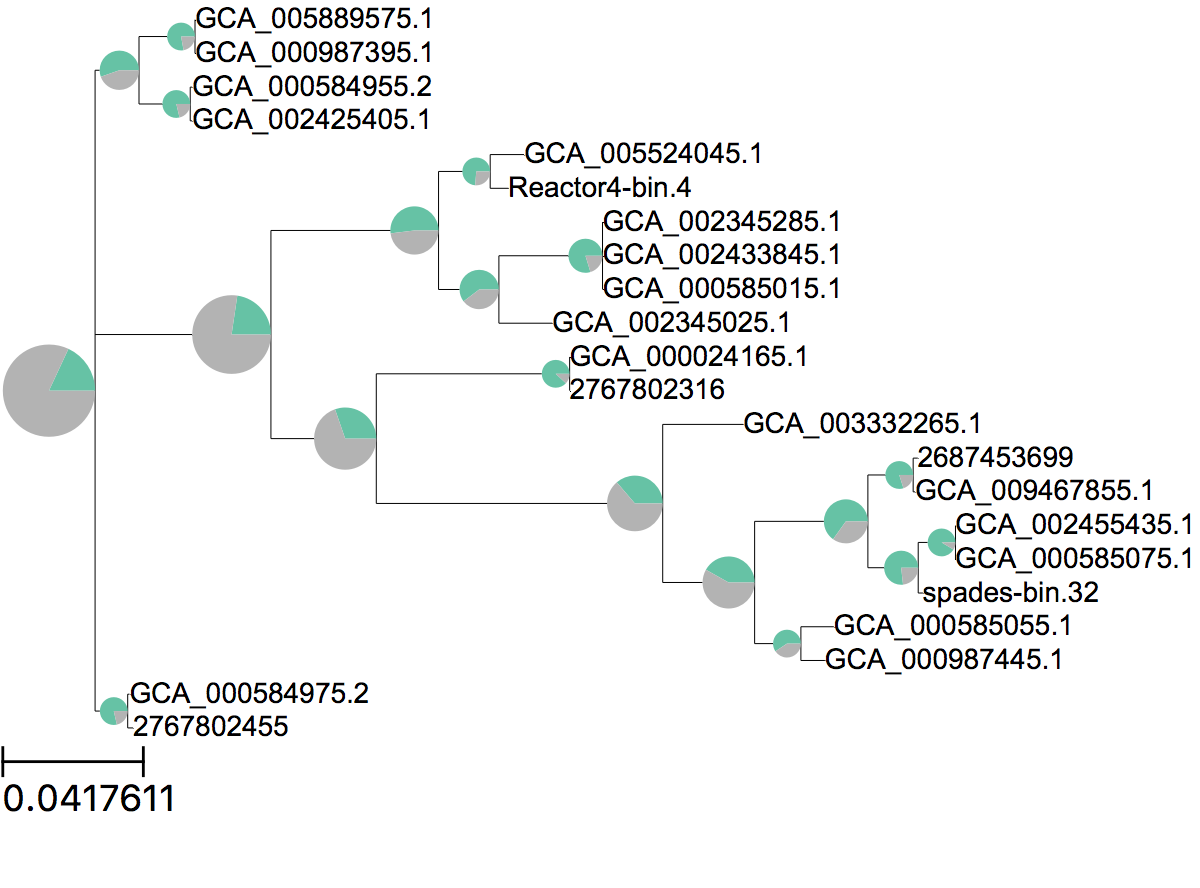

In [23]:
tree.render('%%inline',w=1200)

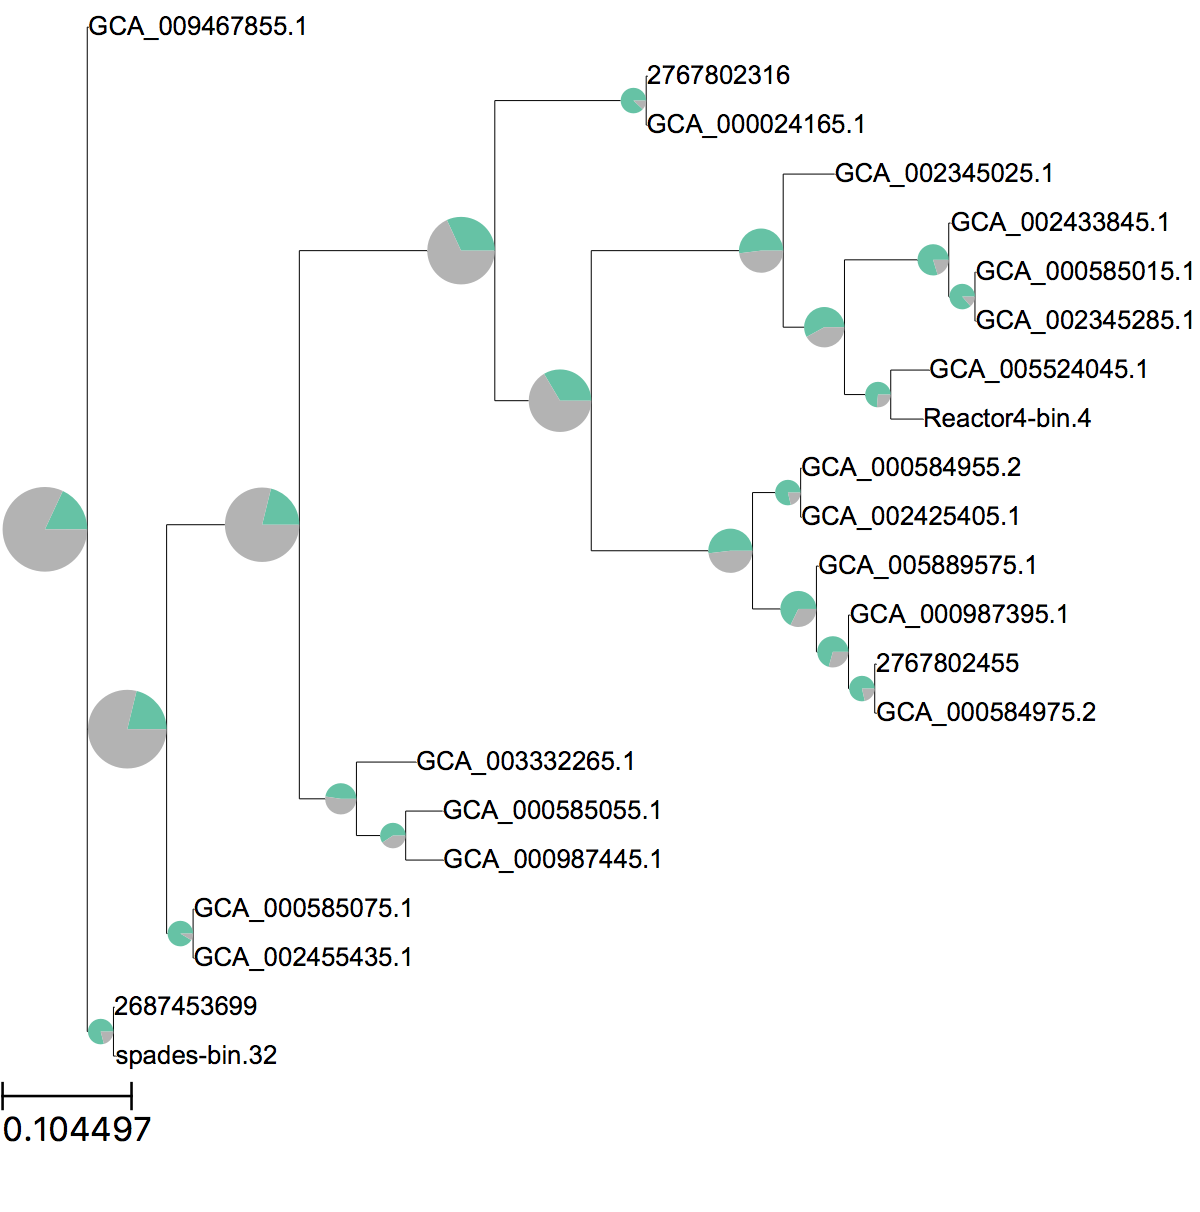

In [9]:
ts = TreeStyle()
ts.branch_vertical_margin = 7
tree.render('%%inline',w=1200,tree_style=ts)